In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
import pandas as pd 
data = pd.read_csv("CC GENERAL.csv")

### Data Cleaning and Visualisation


In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.dropna(axis = 0,inplace =True)

In [6]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
data.drop("CUST_ID",axis = 1,  inplace = True)

In [8]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


## Visualising the data

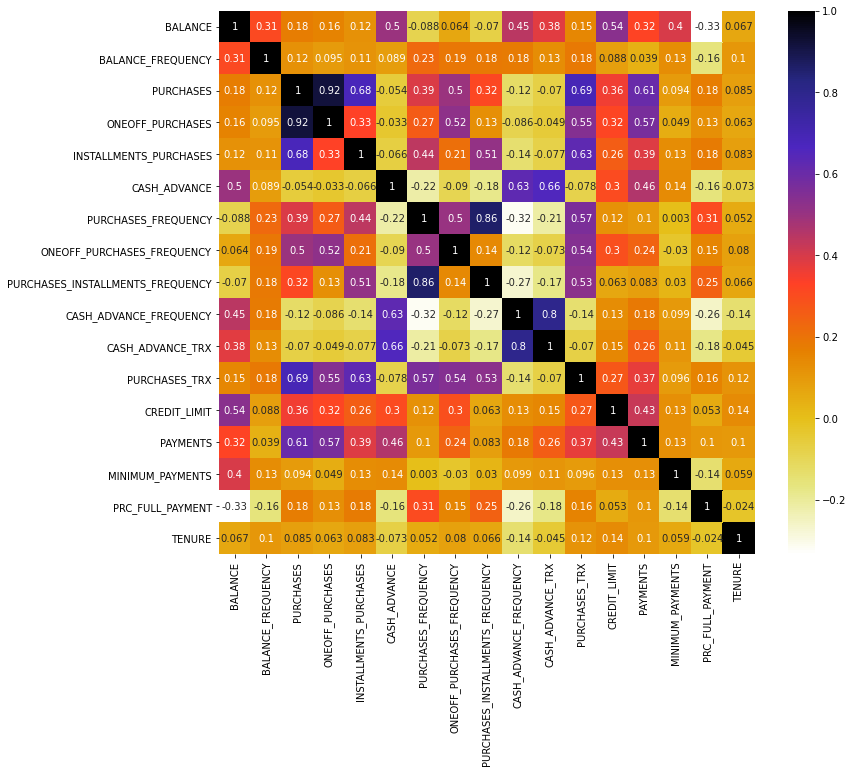

In [9]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [10]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [11]:
corr_features = correlation(data, 0.5) #0.5is the threshold value ie if the correltion vlue is higher tha 0.7 it will remove that feature

In [12]:
print(corr_features)

{'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_TRX', 'INSTALLMENTS_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS', 'PURCHASES_TRX', 'CASH_ADVANCE_FREQUENCY', 'ONEOFF_PURCHASES'}


In [13]:
# now that we can do is either remove them or keep hem intact since we have 17 fetures i will remove them
for i in corr_features:
    data.drop(i, axis =1, inplace = True)

In [14]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.000000,0.166667,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,6442.945483,0.000000,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.000000,1.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,0.000000,0.083333,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.000000,0.666667,2407.246035,0.000000,12


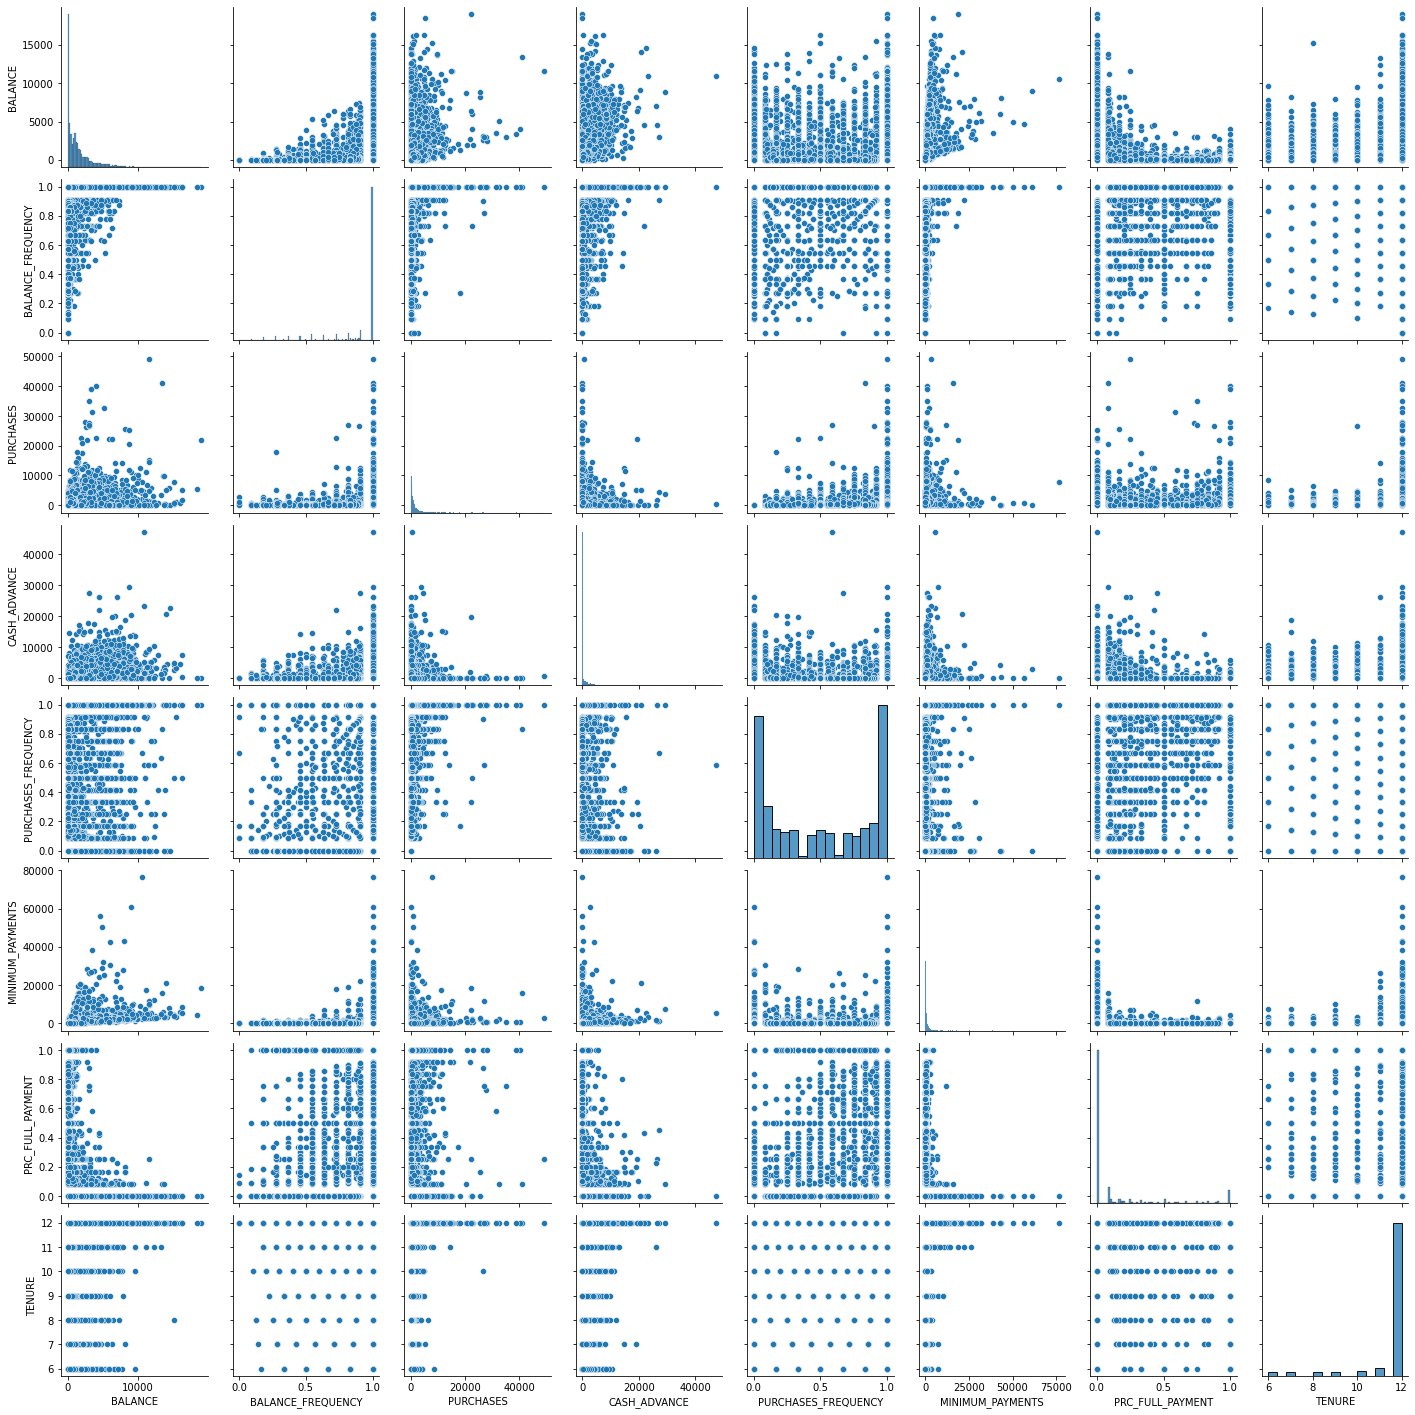

In [15]:
sns.pairplot(data)

### Standardising the data

In [16]:
sc = StandardScaler()
sc.fit(data)
data = sc.transform(data)

In [17]:
data1 = pd.DataFrame(data)
data1.head()

,0,1,2,3,4,5,6,7
0,-0.744625,-0.370047,-0.429184,-0.468655,-0.820769,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,2.568556,-1.236139,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,-0.468655,1.256077,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.468655,-1.028455,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.468655,0.425339,0.650363,-0.537727,0.355181


In [18]:
data1

,0,1,2,3,4,5,6,7
0,-0.744625,-0.370047,-0.429184,-0.468655,-0.820769,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,2.568556,-1.236139,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,-0.468655,1.256077,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.468655,-1.028455,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.468655,0.425339,0.650363,-0.537727,0.355181
...,...,...,...,...,...,...,...,...
8631,-0.761342,-1.902089,-0.463563,-0.468655,-0.820769,-0.345988,-0.537727,-4.221800
8632,-0.750546,0.505405,-0.338865,-0.468655,1.256077,-0.343706,1.150015,-4.221800
8633,-0.752977,-0.297095,-0.406572,-0.468655,0.840707,-0.329572,0.306144,-4.221800
8634,-0.757721,-0.297095,-0.473208,-0.451422,-1.236139,-0.340811,0.306144,-4.221800


#  Applying the Kmeans Clustering Algo

In [19]:
wcss = []
for i in range (1,11):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(data)
    wcss.append(km.inertia_)

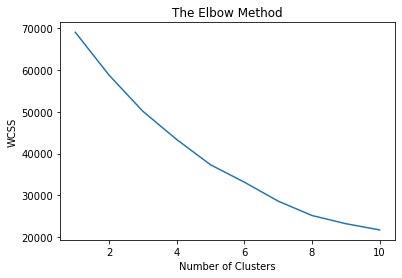

In [20]:
#plotting the graph for elbow method
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Shilhoutte clustring

For n_clusters = 2 The average silhouette_score is : 0.21053156215558994
For n_clusters = 3 The average silhouette_score is : 0.22578699052600423
For n_clusters = 4 The average silhouette_score is : 0.2564496514845115
For n_clusters = 5 The average silhouette_score is : 0.2886901299413225
For n_clusters = 6 The average silhouette_score is : 0.3132207856128806
For n_clusters = 7 The average silhouette_score is : 0.3236789862140315
For n_clusters = 8 The average silhouette_score is : 0.33095564270490424
For n_clusters = 9 The average silhouette_score is : 0.3338264870779114
For n_clusters = 10 The average silhouette_score is : 0.334031874964619


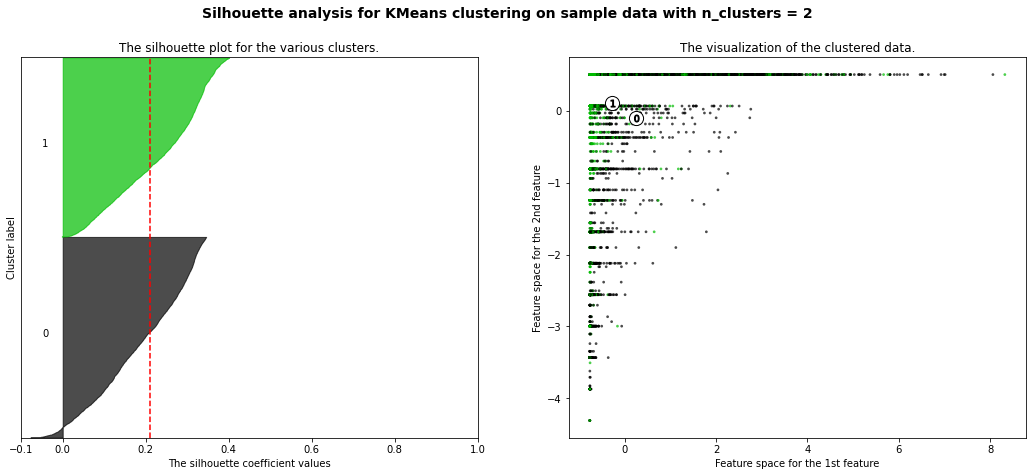

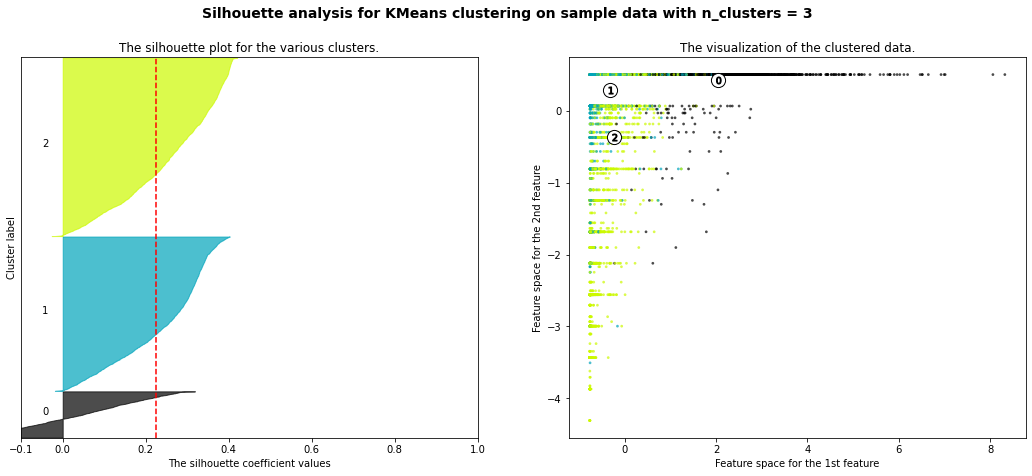

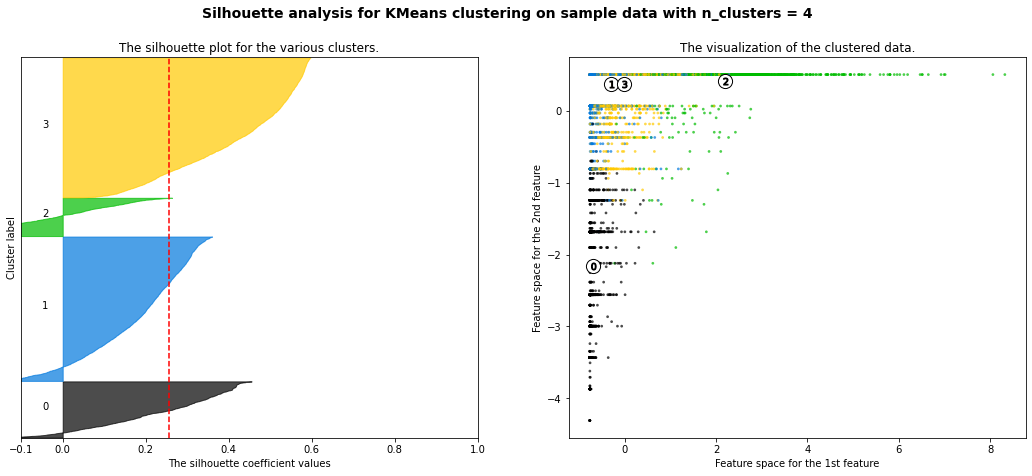

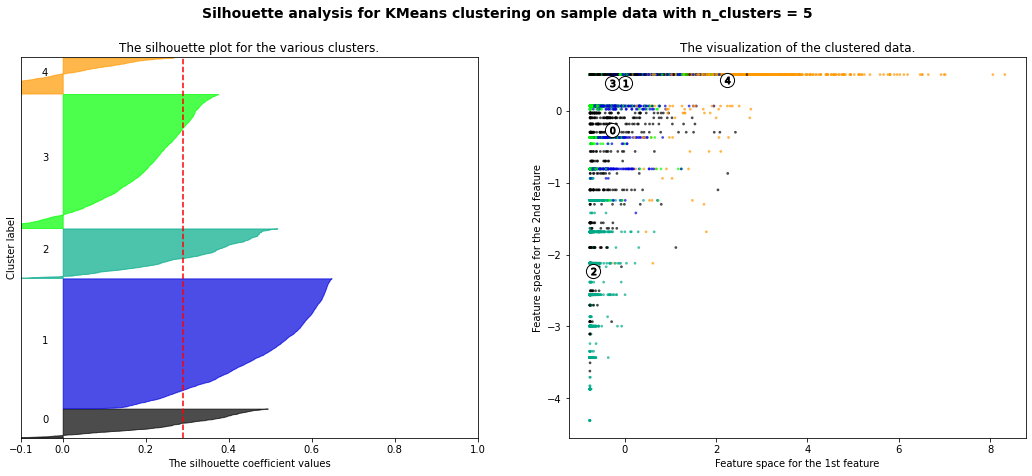

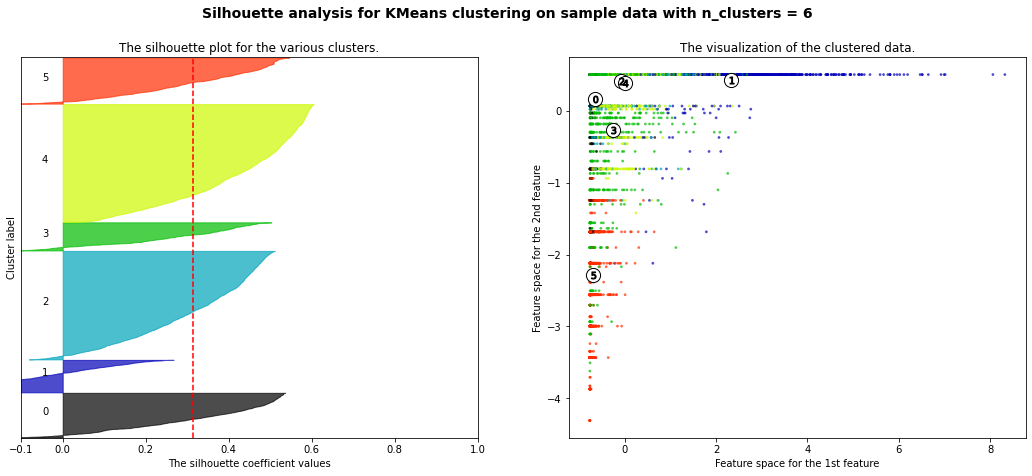

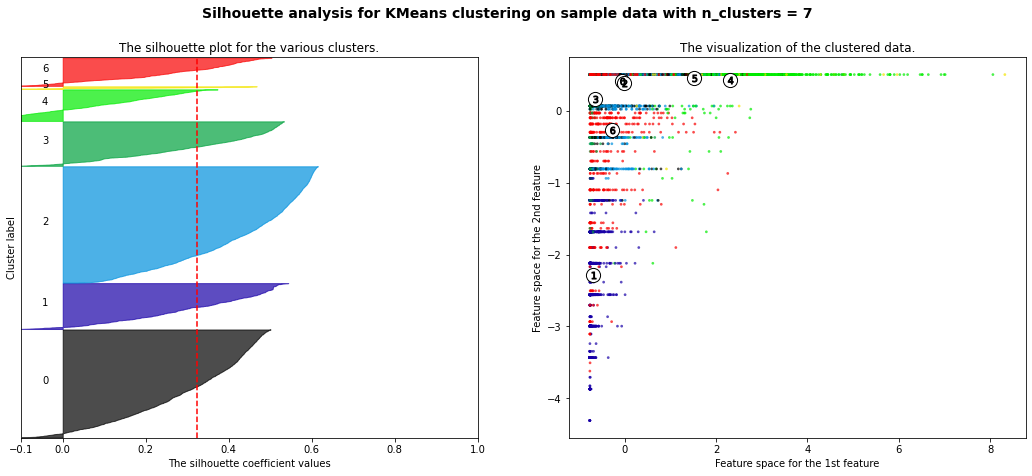

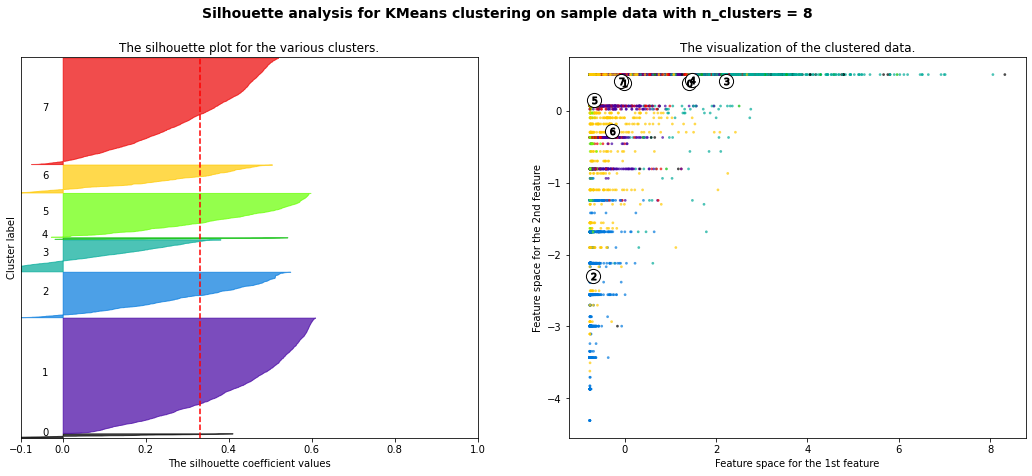

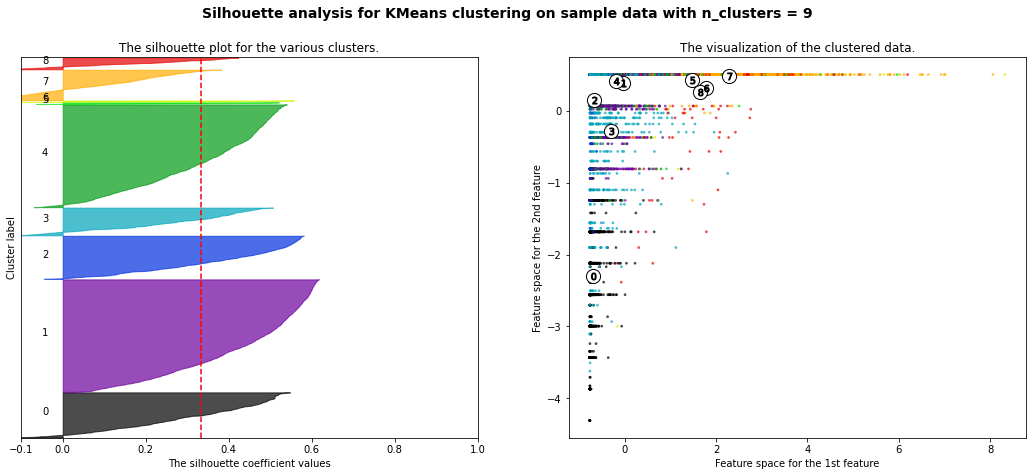

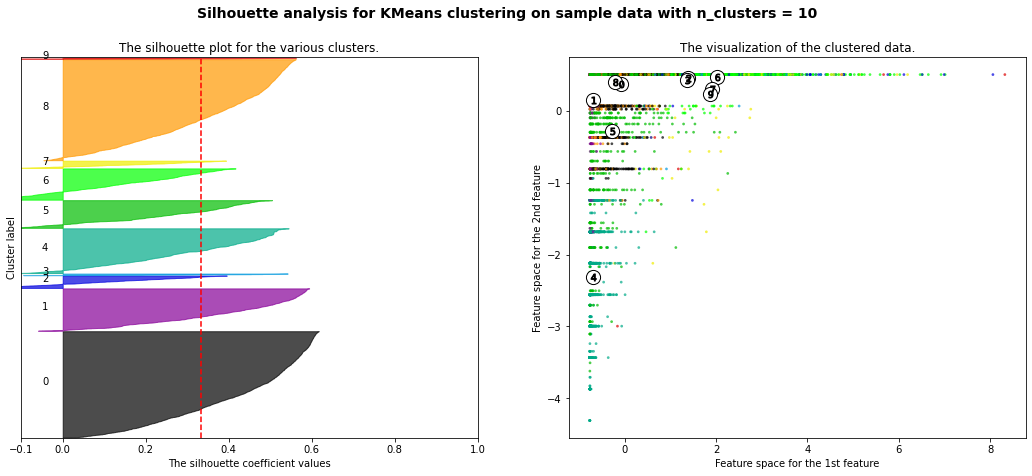

In [21]:
X = data
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

 FROM GRAPHS ABOVE WE CAN SEE THAT CLUSTER 2 AND 3 ARE KIND OF BEST BUT I AM NOT SATISFIED SO I WILL USE PCA AND THEN K MEANS OR WILL USE DBASCAN

In [22]:
#TRAINING KMEANS WITH 2 CLUSTER
km2 = KMeans(n_clusters = 2 )
km2.fit(data)
ypred = km2.predict(data)

In [23]:
print(ypred)

[1 1 0 ... 0 1 1]


In [24]:
data.shape

(8636, 8)

In [25]:
ypred.shape

(8636,)

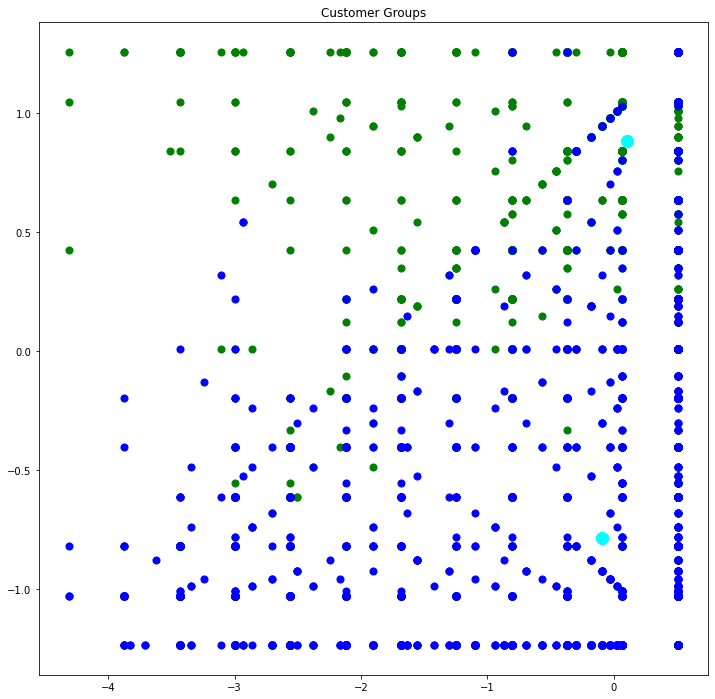

In [26]:
#PLOTTING THE GRAPH AND THEN PLOTTING THE CLUSTER CENTRES
plt.figure(figsize = (12,12))
plt.scatter(data[ypred ==0,1], data[ypred==0,4],s = 50, c = 'green',label = 'Cluster 1')
plt.scatter(data[ypred==1,1], data[ypred==1,4],s = 50, c = 'blue',label = 'Cluster 2')


plt.scatter(km2.cluster_centers_[:,1],km2.cluster_centers_[:,4], s =150,c = 'cyan', label = "centroid")
plt.title("Customer Groups")
plt.show()

### Pca on the kmeans data

In [27]:
# Principal Component analysis
from sklearn.decomposition import PCA
pca=PCA(n_components= 2) 
pca.fit(data)
x_pca=pca.transform(data)
print("Normal data shape = {}".format(data.shape))
print("Pca transformed data shape = {}".format(x_pca.shape))


Normal data shape = (8636, 8)
Pca transformed data shape = (8636, 2)


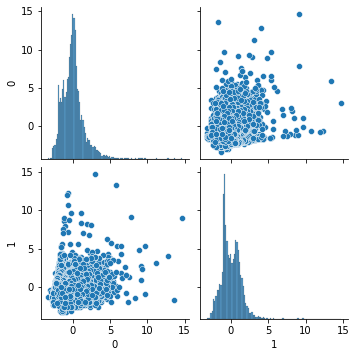

In [28]:
x_pca = pd.DataFrame(x_pca)
sns.pairplot(x_pca)

For n_clusters = 2 The average silhouette_score is : 0.34459687453587085
For n_clusters = 3 The average silhouette_score is : 0.3831275931953335
For n_clusters = 4 The average silhouette_score is : 0.3806446585389076
For n_clusters = 5 The average silhouette_score is : 0.38279601040678257
For n_clusters = 6 The average silhouette_score is : 0.3902291112969863
For n_clusters = 7 The average silhouette_score is : 0.39193006270354813
For n_clusters = 8 The average silhouette_score is : 0.39199104568255466
For n_clusters = 9 The average silhouette_score is : 0.4011911311290501
For n_clusters = 10 The average silhouette_score is : 0.3831734495188877


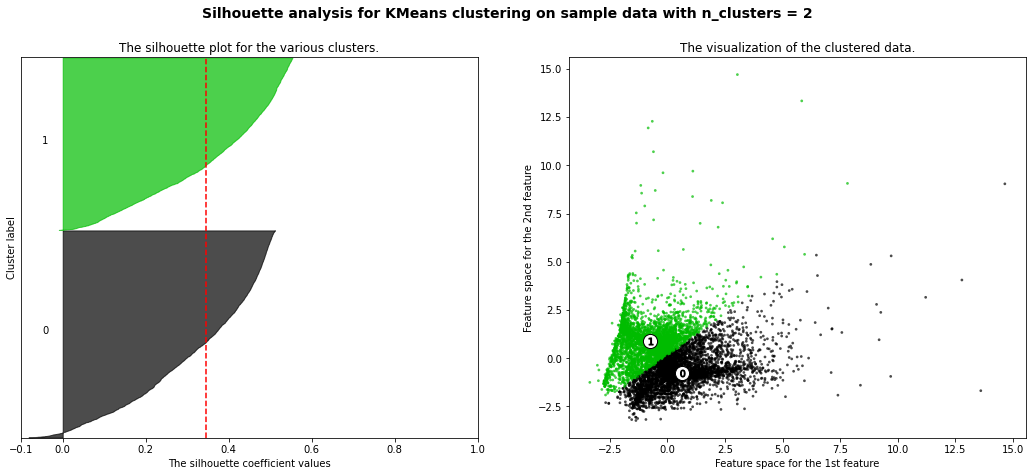

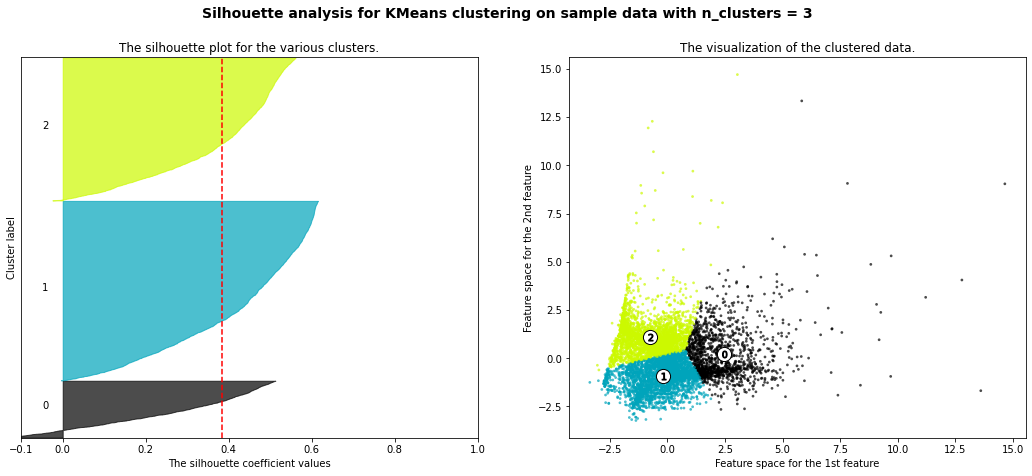

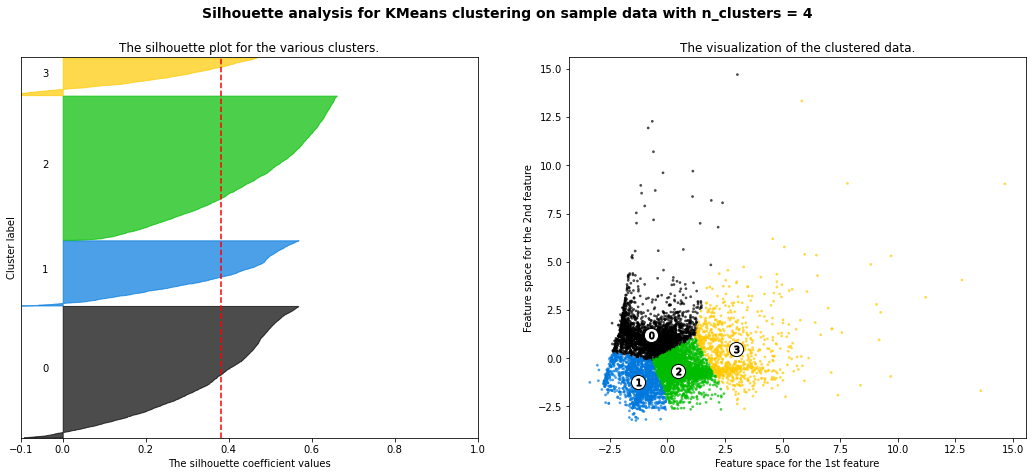

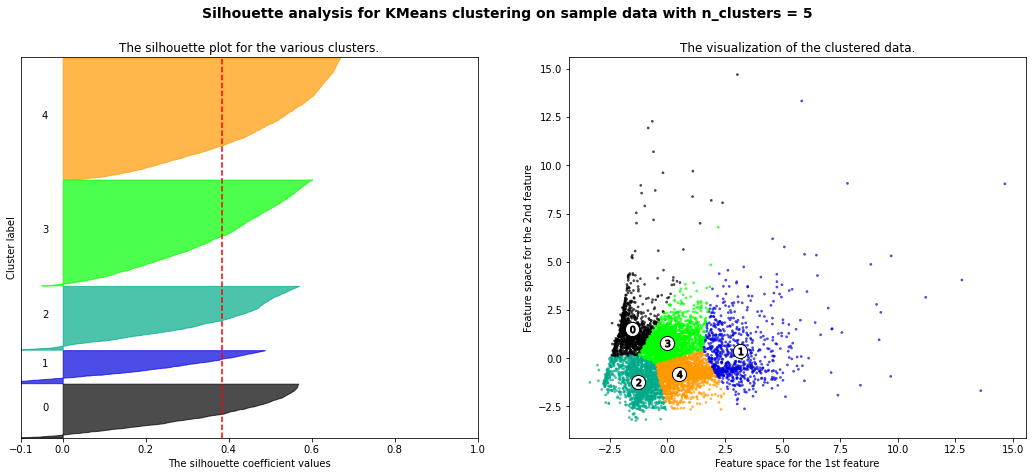

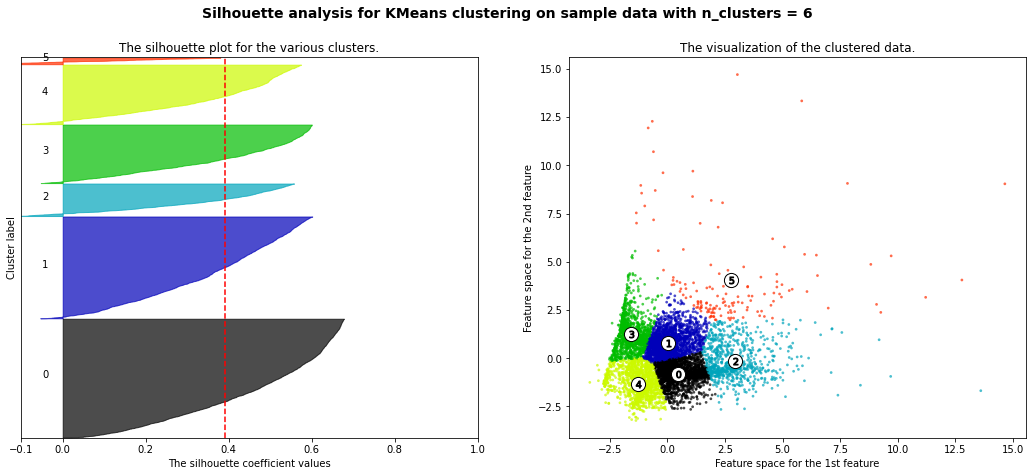

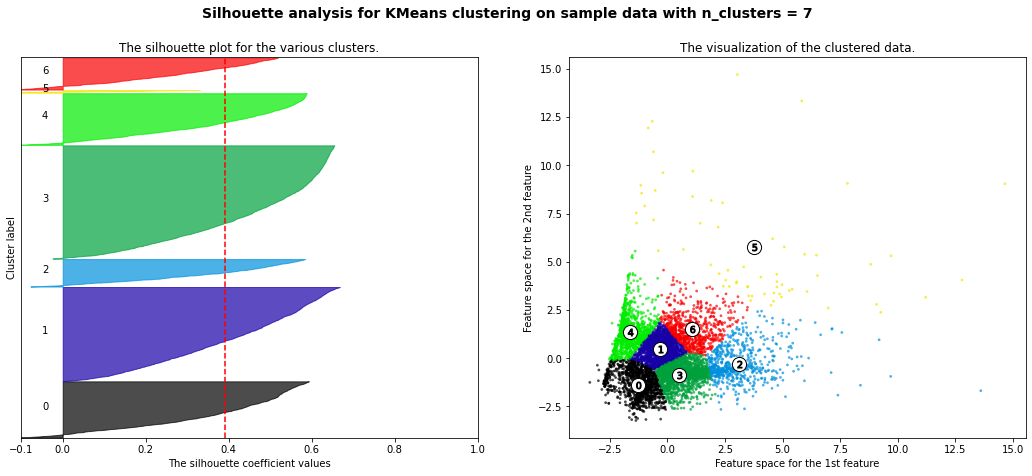

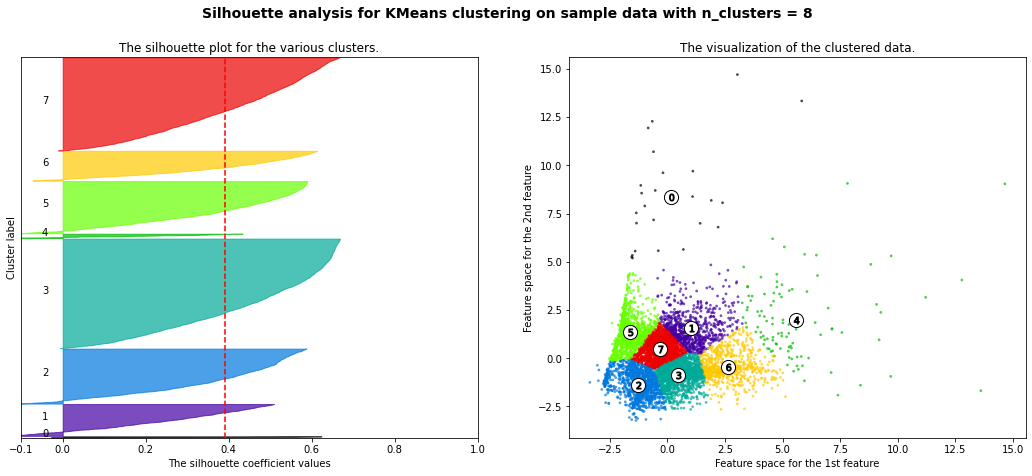

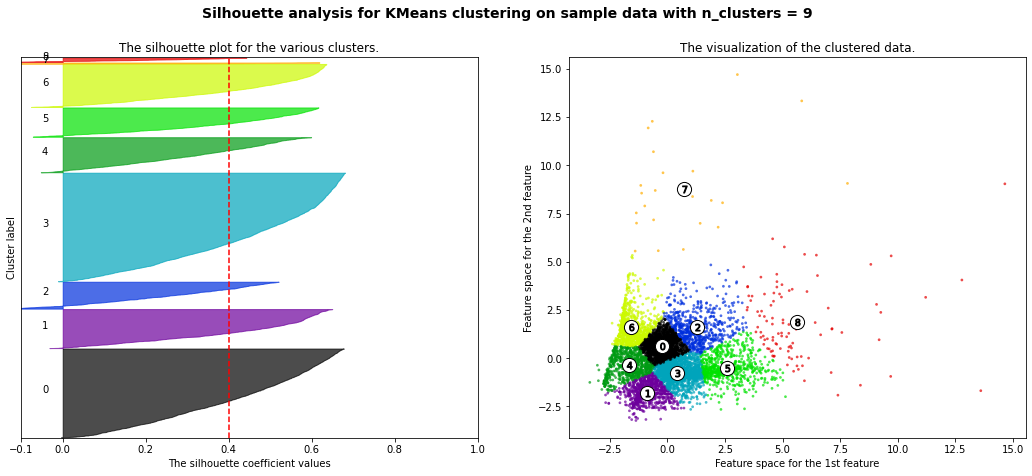

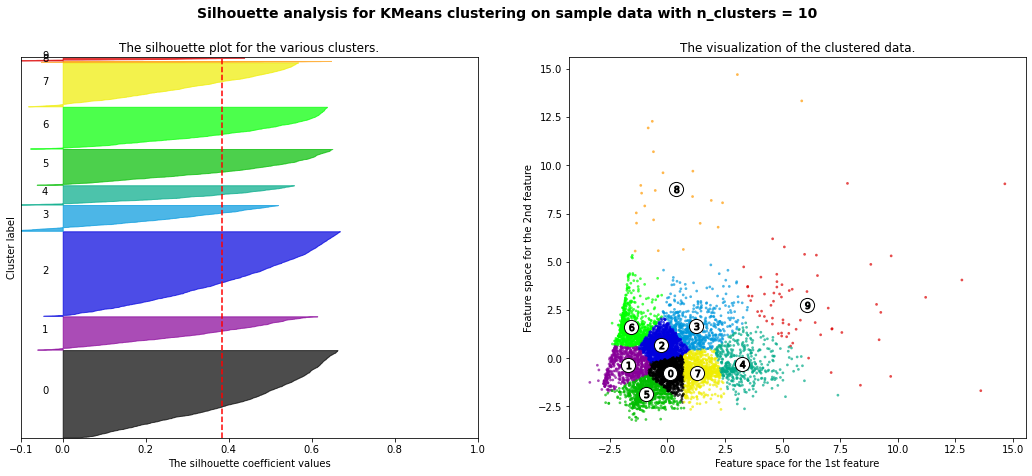

In [29]:
#Using this reduced data we do silhoutte clustring
X = np.array(x_pca)
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

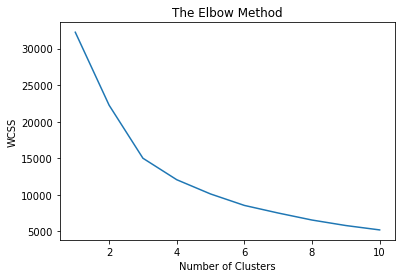

In [30]:
#Applying the elbow method for the reduced dataset
wcss = []
for i in range (1,11):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(x_pca)
    wcss.append(km.inertia_)
#plotting the graph for elbow method
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
# now from this we can see that n_cluster = 2 is best kind off so i am gonna go with 2 cluster
#tRAINING KMEANS WITH 2 CLUSTER
km3 = KMeans(n_clusters = 2 )
km3.fit(x_pca)
ypred1 = km3.predict(x_pca)


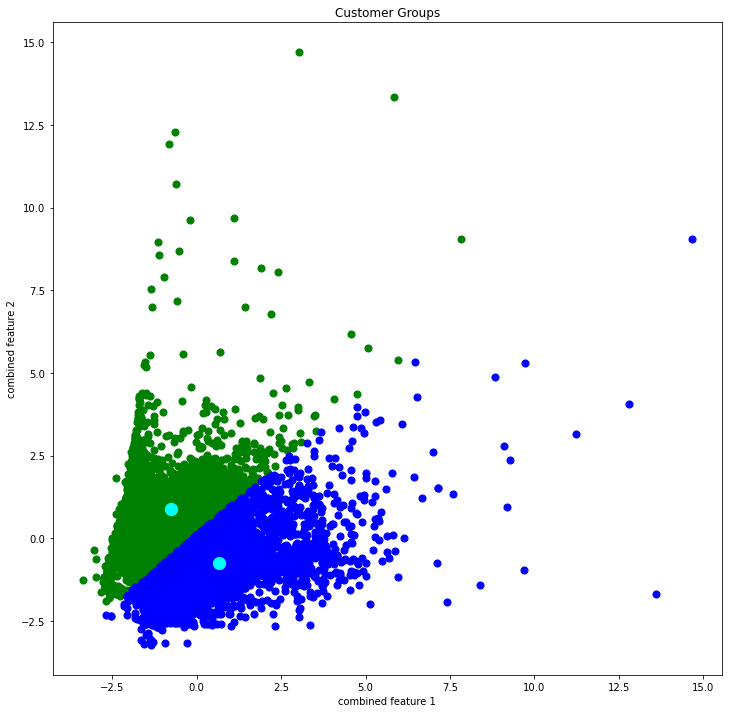

In [32]:
#PLOTTING THE GRAPH AND THEN PLOTTING THE CLUSTER CENTRES
x_pca = np.array(x_pca)
plt.figure(figsize = (12,12))
plt.scatter(x_pca[ypred1 ==0,0], x_pca[ypred1==0,1],s = 50, c = 'green',label = 'Cluster 1')
plt.scatter(x_pca[ypred1==1,0], x_pca[ypred1==1,1],s = 50, c = 'blue',label = 'Cluster 2')


plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1], s =150,c = 'cyan', label = "centroid")
plt.title("Customer Groups")
plt.xlabel("combined feature 1")
plt.ylabel("combined feature 2")
plt.show()

Happy with this we can also do this with 3 clusters

In [64]:
# now from this we can see that n_cluster = 2 is best kind off so i am gonna go with 2 cluster
#tRAINING KMEANS WITH 2 CLUSTER
km3 = KMeans(n_clusters = 3 )
km3.fit(x_pca)
ypred1 = km3.predict(x_pca)


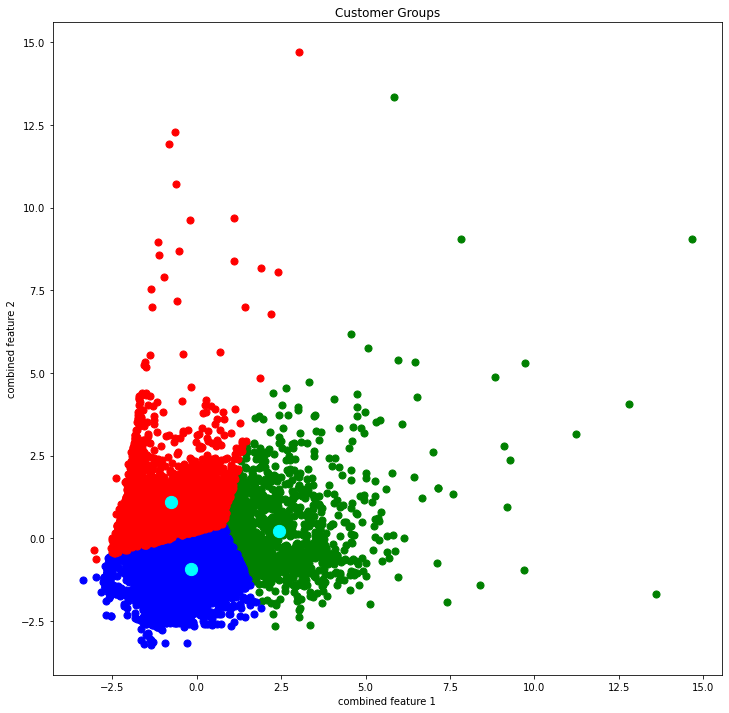

In [67]:
#PLOTTING THE GRAPH AND THEN PLOTTING THE CLUSTER CENTRES
x_pca = np.array(x_pca)
plt.figure(figsize = (12,12))
plt.scatter(x_pca[ypred1 ==0,0], x_pca[ypred1==0,1],s = 50, c = 'green',label = 'Cluster 1')
plt.scatter(x_pca[ypred1==1,0], x_pca[ypred1==1,1],s = 50, c = 'blue',label = 'Cluster 2')
plt.scatter(x_pca[ypred1==2,0], x_pca[ypred1==2,1],s = 50, c = 'red',label = 'Cluster 3')

plt.scatter(km3.cluster_centers_[:,0],km3.cluster_centers_[:,1], s =150,c = 'cyan', label = "centroid")
plt.title("Customer Groups")
plt.xlabel("combined feature 1")
plt.ylabel("combined feature 2")
plt.show()

# DBSCAN Algorithm

In [47]:
dbc = DBSCAN(eps=0.9, min_samples=5, metric='euclidean')
dbc.fit(data)
pred = dbc.labels_
print(pred)

[0 0 0 ... 0 0 0]


In [48]:
a = pd.Series(pred)
print(a.unique())


[ 0 -1  2  4  1  3]


In [72]:
c1,c2,c3,c4,c5,c6 = 0,0,0,0,0,0
for i in a:
    if i ==0:
        c1 = c1+1
    if i == 1:
        c2 = c2+1
    if i == -1:
        c3 = c3+1
    if i ==2:
        c4 = c4+1
    if i ==3:
        c5 = c5+1
    if i == 4:
        c6 = c6+1
    
print(""""No of 1 -s {}    no of 0 is {}      no if -1 is{}    no of 2 is {}   
no of 3 is {}    no of 4 is {}""".format(c1,c2,c3,c4,c5,c6))

"No of 1 -s 8099    no of 0 is 5      no if -1 is511    no of 2 is 9   
no of 3 is 5    no of 4 is 7


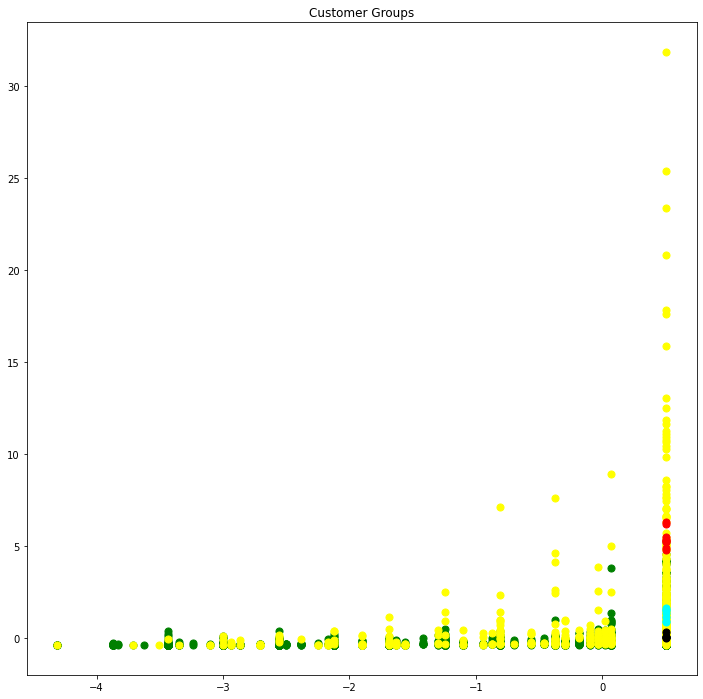

In [53]:
#PLOTTING THE GRAPH AND THEN PLOTTING THE CLUSTER CENTRES
plt.figure(figsize = (12,12))
plt.scatter(data[pred ==0,1], data[pred==0,5],s = 50, c = 'green',label = 'Cluster 1')
plt.scatter(data[pred==1,1], data[pred==1,5],s = 50, c = 'blue',label = 'Cluster 2')
plt.scatter(data[pred==-1,1], data[pred==-1,5],s = 50, c = 'yellow',label = 'Cluster 3')
plt.scatter(data[pred==2,1], data[pred==2,5],s = 50, c = 'red',label = 'Cluster 4')
plt.scatter(data[pred==3,1], data[pred==3,5],s = 50, c = 'black',label = 'Cluster 5')
plt.scatter(data[pred==4,1], data[pred==4,5],s = 50, c = 'cyan',label = 'Cluster 6')
#plt.scatter(dbc.cluster_centers_[:,1],dbc.cluster_centers_[:,4], s =150,c = 'cyan', label = "centroid")
plt.title("Customer Groups")
plt.show()

Not that good will use pca

In [60]:
# the pca data is saved as x_pca
dbc = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
dbc.fit(x_pca)
pred = dbc.labels_
print(pred)

[0 0 0 ... 0 0 0]


In [61]:
aa= pd.Series(pred)
print(aa.unique())

[ 0 -1  1]


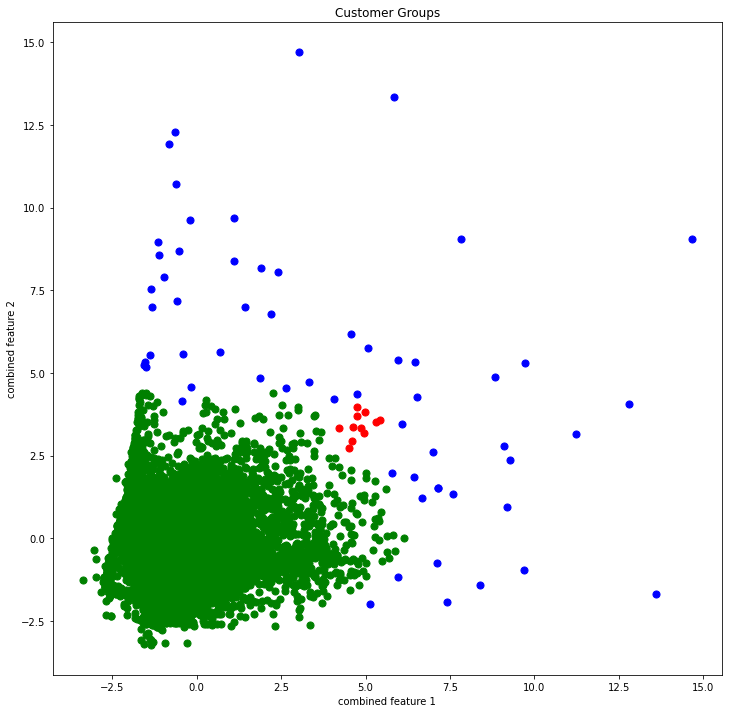

In [63]:
#PLOTTING THE GRAPH AND THEN PLOTTING THE CLUSTER CENTRES
x_pca = np.array(x_pca)
plt.figure(figsize = (12,12))
plt.scatter(x_pca[pred==0,0], x_pca[pred==0,1],s = 50, c = 'green',label = 'Cluster 1')
plt.scatter(x_pca[pred==-1,0], x_pca[pred==-1,1],s = 50, c = 'blue',label = 'Cluster 2')
plt.scatter(x_pca[pred==1,0], x_pca[pred==1,1],s = 50, c = 'red',label = 'Cluster 2')
plt.title("Customer Groups")
plt.xlabel("combined feature 1")
plt.ylabel("combined feature 2")
plt.show()

## finally we can use others as well but this project is used by solving wiht kmeans which looks good